<a href="https://colab.research.google.com/github/gmansilla1508/gmansilla1508/blob/main/Trabajopractico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import random
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.cluster import spectral_clustering
from sklearn.cluster import AgglomerativeClustering



 Dimensiones del dataset:

(1797, 64)

 Dimensiones del vector solución:

(1797,)

 Cantidad de imágenes de cada dígito:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))
[[ 0.  0.  0.  8. 15.  1.  0.  0.]
 [ 0.  0.  1. 14. 13.  1.  1.  0.]
 [ 0.  0. 10. 15.  3. 15. 11.  0.]
 [ 0.  7. 16.  7.  1. 16.  8.  0.]
 [ 0.  9. 16. 13. 14. 16.  5.  0.]
 [ 0.  1. 10. 15. 16. 14.  0.  0.]
 [ 0.  0.  0.  1. 16. 10.  0.  0.]
 [ 0.  0.  0. 10. 15.  4.  0.  0.]]
4


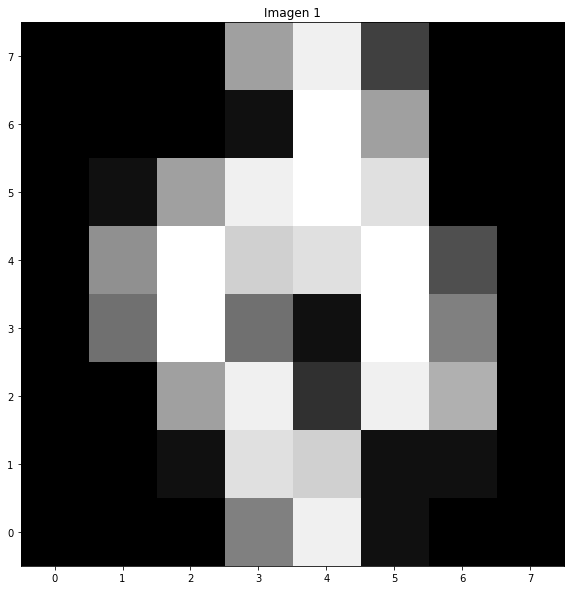

[[255. 255. 255. 247. 240. 254. 255. 255.]
 [255. 255. 254. 241. 242. 254. 254. 255.]
 [255. 255. 245. 240. 252. 240. 244. 255.]
 [255. 248. 239. 248. 254. 239. 247. 255.]
 [255. 246. 239. 242. 241. 239. 250. 255.]
 [255. 254. 245. 240. 239. 241. 255. 255.]
 [255. 255. 255. 254. 239. 245. 255. 255.]
 [255. 255. 255. 245. 240. 251. 255. 255.]]


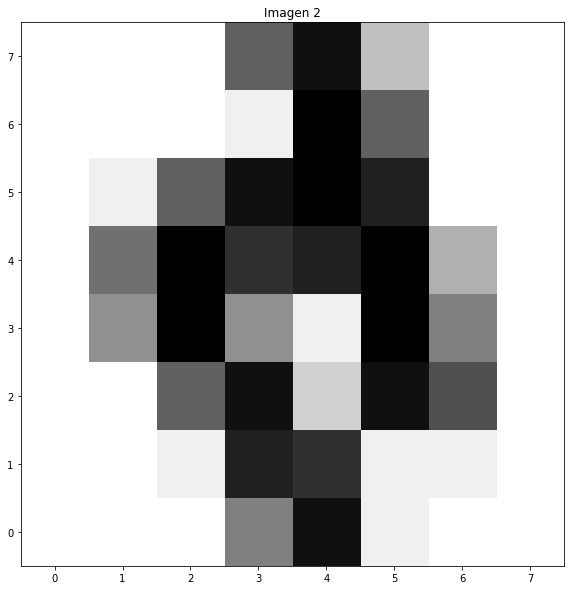

[[255. 255. 255. 243. 242. 250. 255. 255.]
 [255. 255. 255. 244. 239. 246. 255. 255.]
 [255. 255. 252. 240. 239. 249. 255. 255.]
 [255. 248. 240. 239. 239. 253. 255. 255.]
 [255. 255. 254. 239. 239. 252. 255. 255.]
 [255. 255. 254. 239. 239. 249. 255. 255.]
 [255. 255. 254. 239. 239. 249. 255. 255.]
 [255. 255. 255. 244. 239. 245. 255. 255.]]


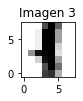

In [8]:
X,y= load_digits(return_X_y=True)
print("\n Dimensiones del dataset:\n")
print(X.shape)
print("\n Dimensiones del vector solución:\n")
print(y.shape)
print("\n Cantidad de imágenes de cada dígito:\n")
print(np.unique(y,return_counts=True)) #Se ve que las clases están muy balanceadas (entre 174 y 183 ncounts)
imagen=X[14,:].reshape(8,8) #Ahora vamos a imprimir una de las imágenes
print(imagen)
print(y[14])
plt.figure(figsize=(10,10))
plt.imshow(imagen,cmap=plt.cm.gray)
plt.title("Imagen 1")
plt.gca().invert_yaxis()
plt.show()
X=255-X #Ahora invertiremos los colores para ver las imágenes com mayor claridad...
imagen2=X[14,:].reshape(8,8) #...y volvemos a imprimir la misma imagen
print(imagen2)
plt.figure(figsize=(10,10))
plt.imshow(imagen2,cmap=plt.cm.gray)
plt.title("Imagen 2")
plt.gca().invert_yaxis()
plt.show()
imagen3=X[1,:].reshape(8,8) #Realizamos una 3er impresión de otra imagen
print(imagen3)
plt.figure(figsize=(1,1))
plt.imshow(imagen3,cmap=plt.cm.gray)
plt.title("Imagen 3")
plt.gca().invert_yaxis()
plt.show()

In [9]:
#Realizamos ahora una clusterización de nuestro dataset
random.seed(0)
np.random.seed(0) #Colocamos una semilla para poder replicar el experimento
#modelo=KMeans(n_clusters=10,init='random').fit(X) #Armado del modelo
modelo=KMeans(n_clusters=16, init='random', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto').fit(X) #Armado del modelo
resultado=modelo.predict(X) #Predicción
print("\n Imprimimos algunos parámetros del modelo:\n")
print("\n Cantidad de clusters: {}\n".format(modelo.n_clusters))
print("Coeficioente de Silhouette: %0.3f" % metrics.silhouette_score(X,resultado))
print("\n Centros de cada uno de los clusters: {}\n".format(modelo.cluster_centers_))
print("Grupo al cual pertenece cada una de las imágenes:\n {}".format(resultado))


 Imprimimos algunos parámetros del modelo:


 Cantidad de clusters: 16

Coeficioente de Silhouette: 0.184

 Centros de cada uno de los clusters: [[255.         254.65753425 246.95890411 ... 242.89041096 243.75342466
  250.54794521]
 [255.         254.6043956  247.62637363 ... 252.95604396 254.97802198
  255.        ]
 [255.         254.98       252.4        ... 254.69       254.95
  255.        ]
 ...
 [255.         255.         253.82681564 ... 241.83240223 250.37988827
  254.82681564]
 [255.         254.69473684 247.78947368 ... 255.         255.
  255.        ]
 [255.         255.         254.97468354 ... 243.97468354 253.17721519
  255.        ]]

Grupo al cual pertenece cada una de las imágenes:
 [ 9  7  4 ...  4 12  4]


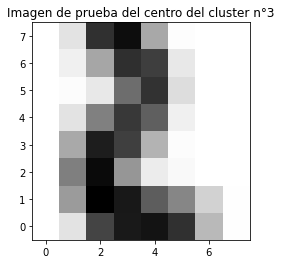

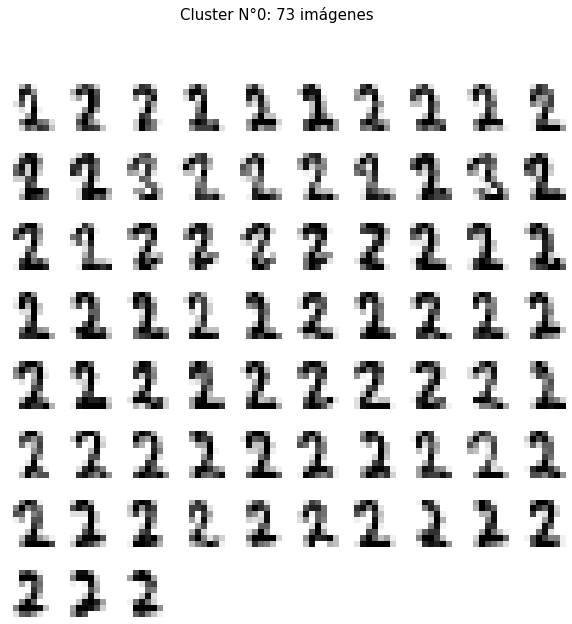

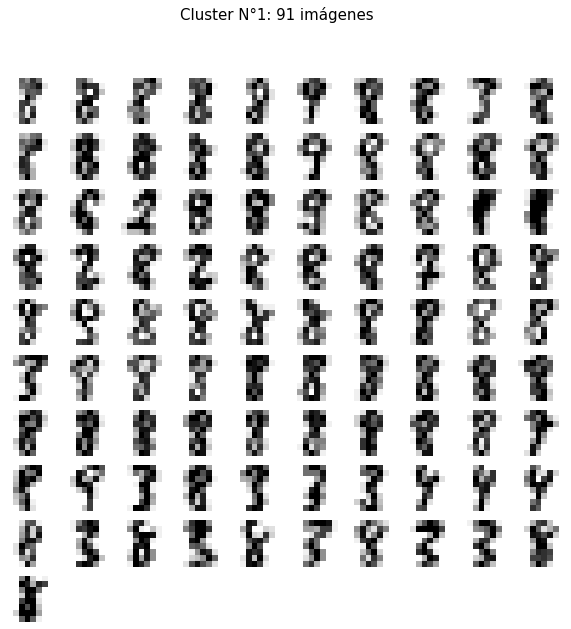

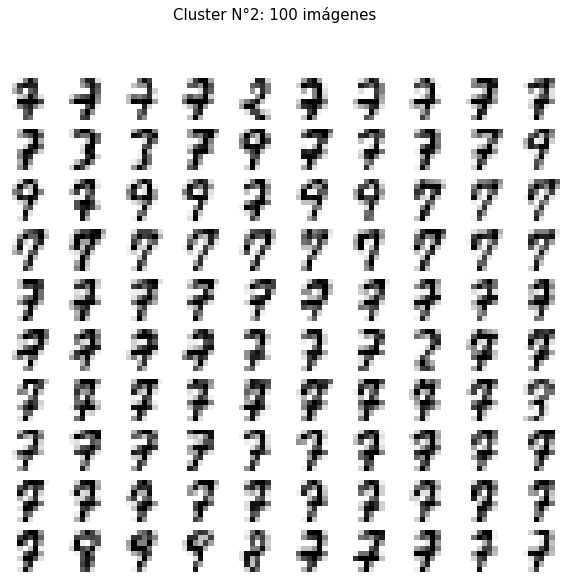

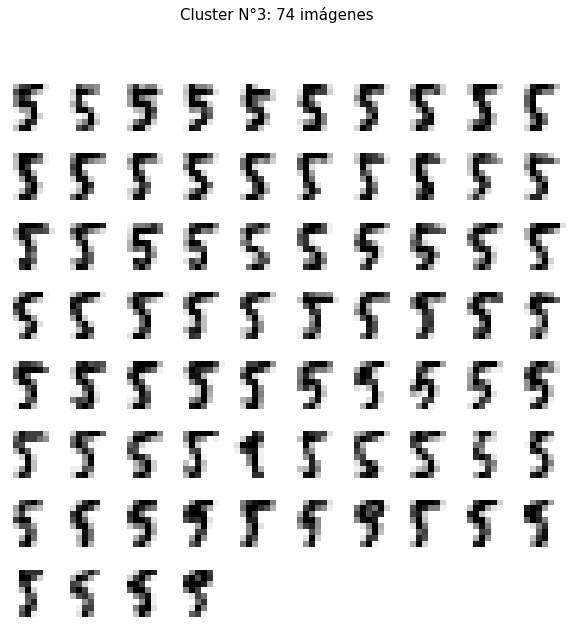

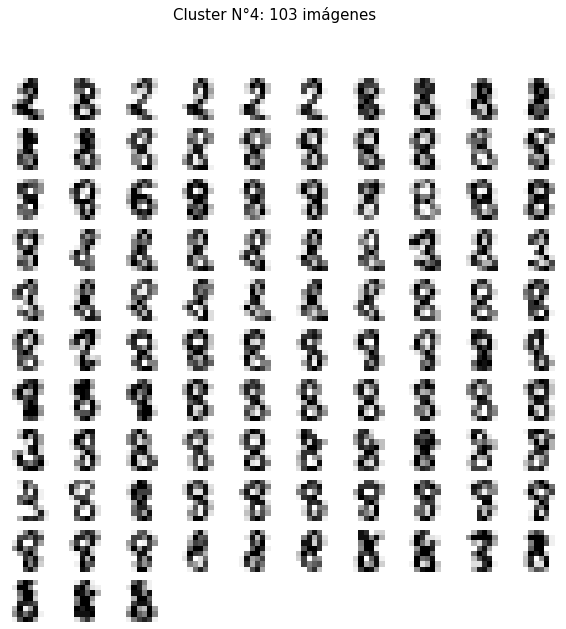

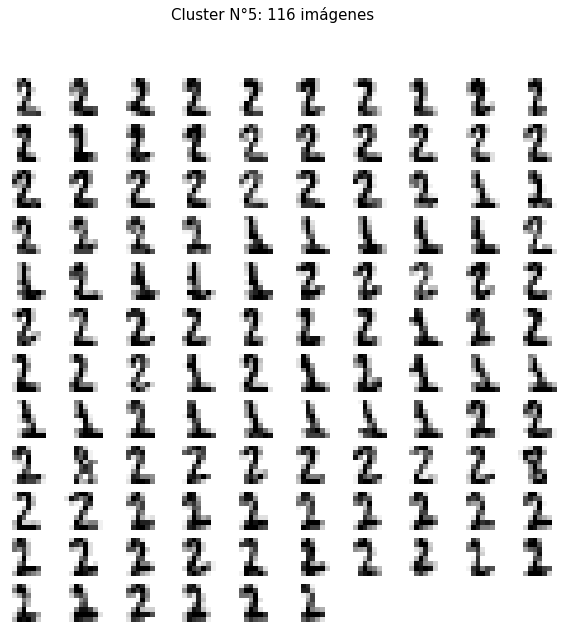

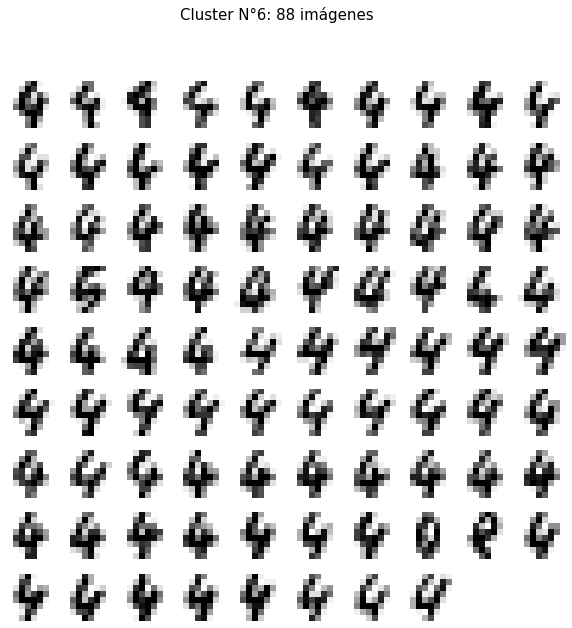

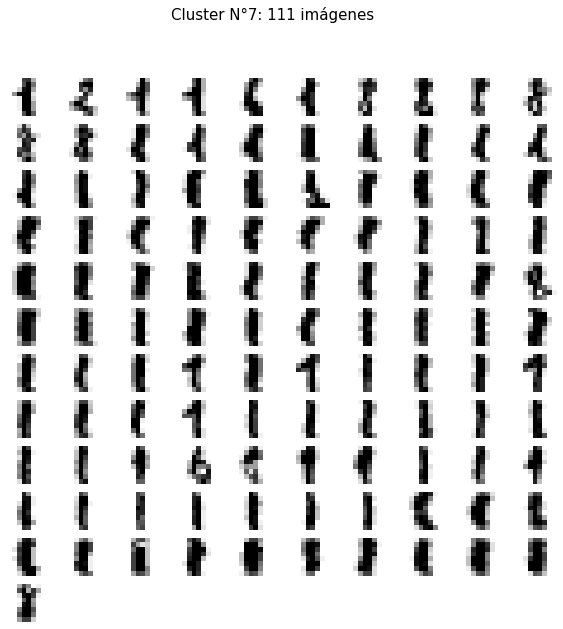

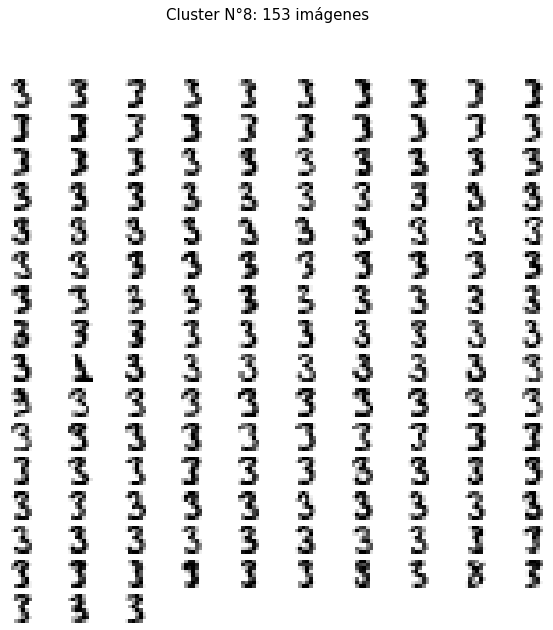

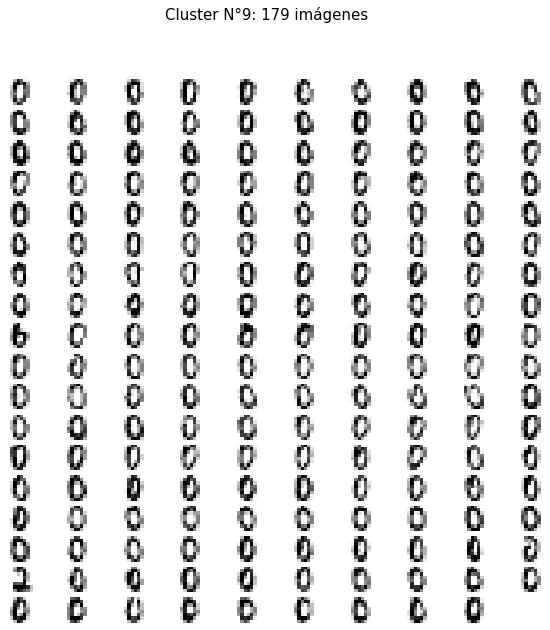

In [10]:
imagen_prueba=modelo.cluster_centers_[3,:].reshape(8,8)
plt.imshow(imagen_prueba,cmap=plt.cm.gray)
plt.title("Imagen de prueba del centro del cluster n°3")
plt.gca().invert_yaxis()
plt.show() #Parece ser un 6. Lo verificaremos en breve...
#Ahora vamos a imprimir las imágenes de cada cluster
for i in range(0,10):
    indicador = np.where(resultado==i)[0] 
    Cantidad = indicador.shape[0]      
    altura = np.floor(Cantidad/10.)     
    plt.figure(figsize=(10,10))
    for j in range(0, Cantidad):
        plt.subplot(altura+1, 10, j+1)
        imagen = X[indicador[j], ]
        imagen = imagen.reshape(8, 8)
        plt.imshow(imagen, cmap=plt.cm.gray)
        plt.axis('off')
    plt.suptitle("Cluster N°{}: {} imágenes".format(i,Cantidad),size=15)
    plt.show()

"""
Hay algunos clusters que con el método de Kmeans quedaron medio feos y no separan bien las clases. Hay
algunos grupos en los que visiblemente aparecen 2, 3 y en algú caso hasta 4 dígitos diferenetes. Esto no
me serviría para hacer un reconocimiento por imágenes de diferentes dígitos. Entonces va a haber que probar
otro/s modelo/s de clusterización y/o otro/s parametro/s dentor del mismo modelo Kmeans. Entonces antes que nada,
necesitaremos una función que replique las pruebas del último bloque de código escrito, pero adaptado a otros
modelos.
"""

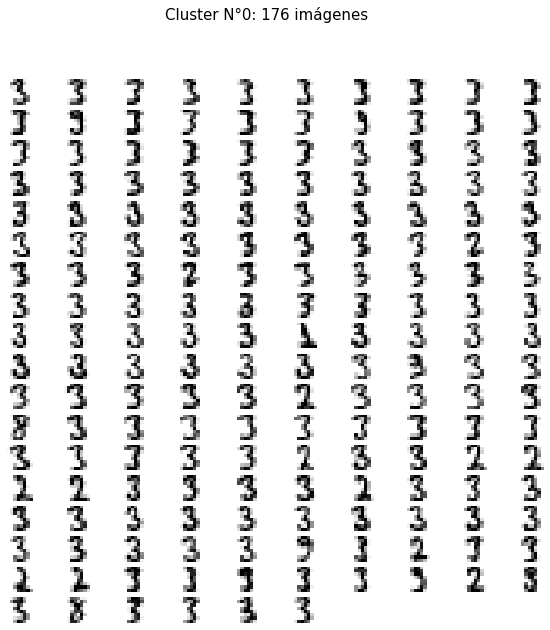

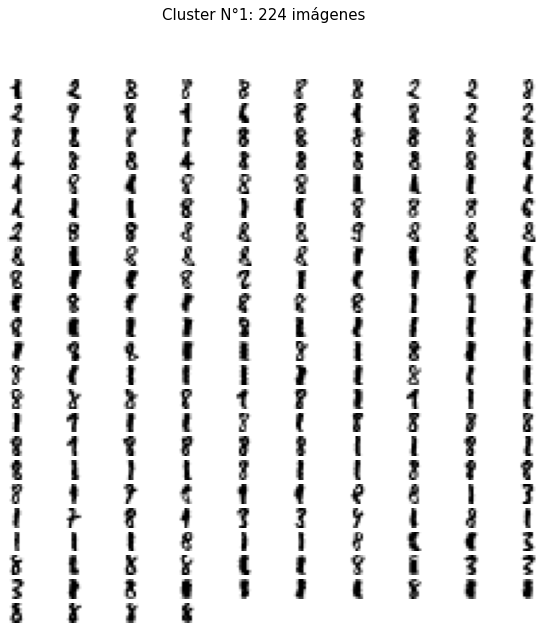

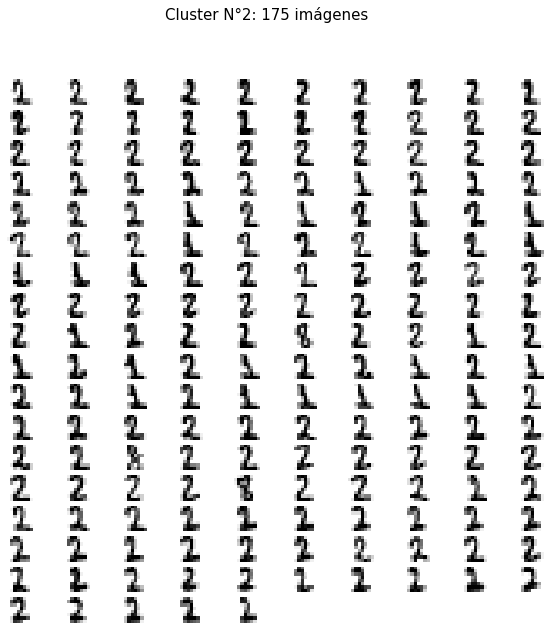

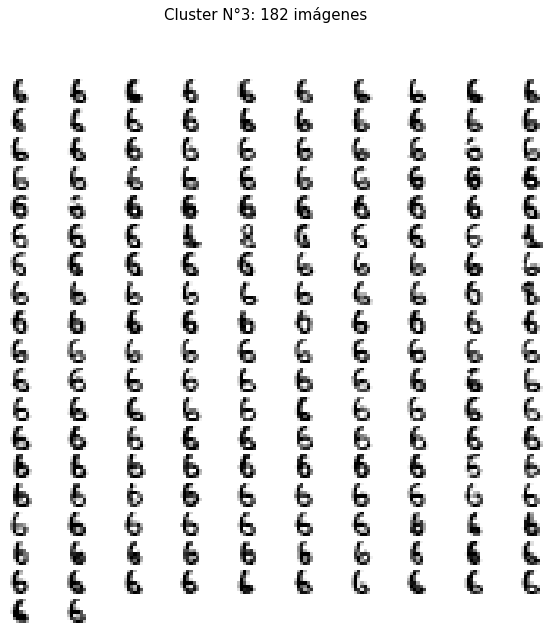

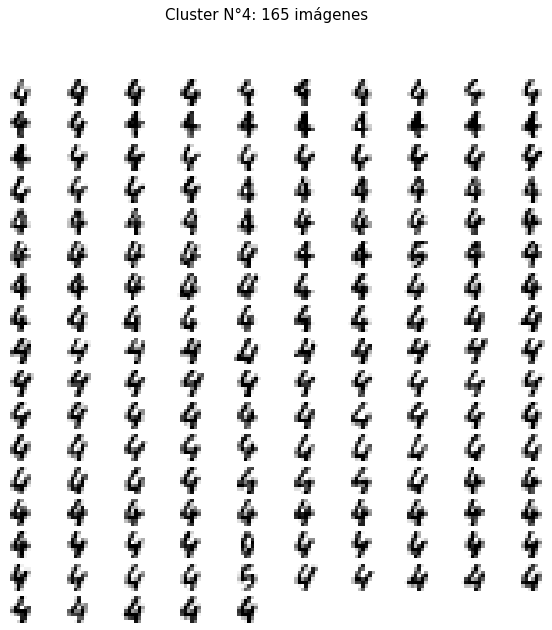

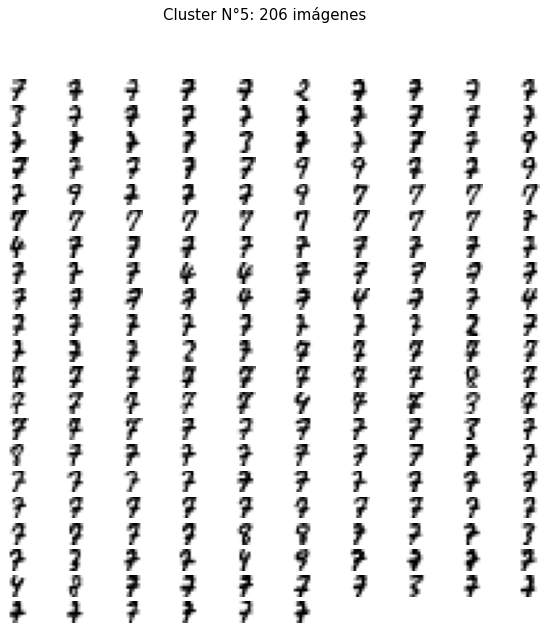

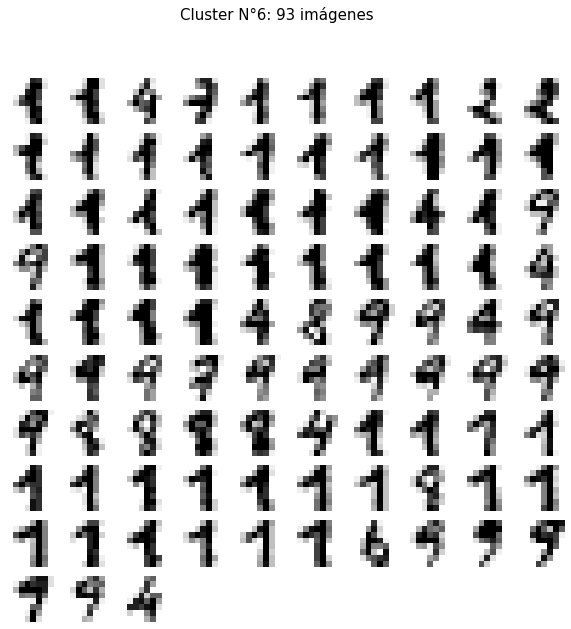

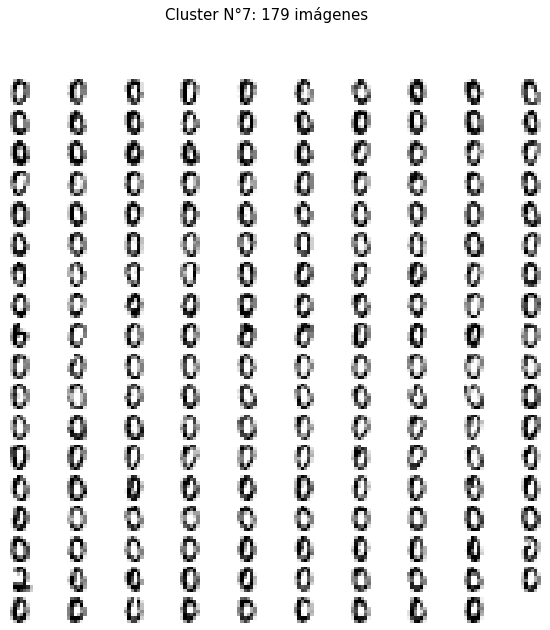

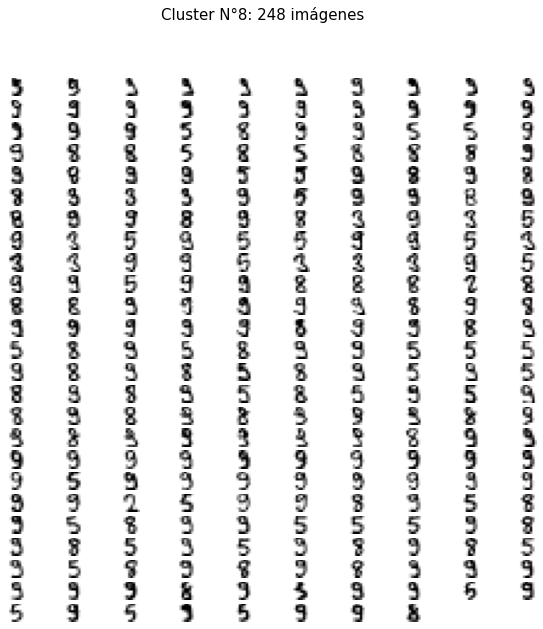

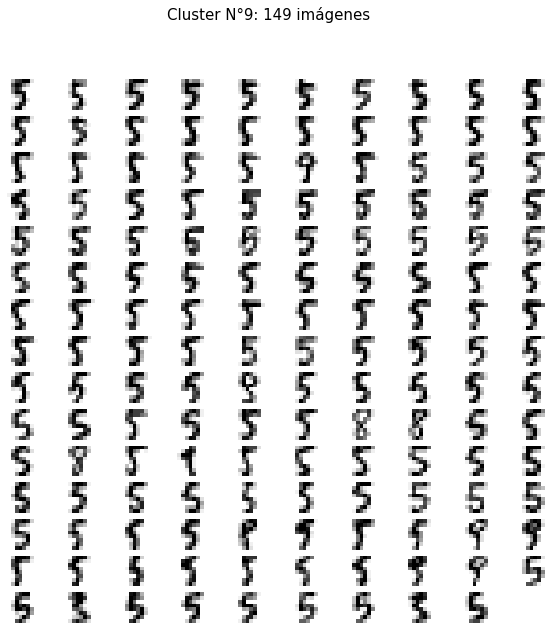

In [12]:
#Definimos la función de impresión de clusters
def cluster_imagen(result,XX):
    for i in range(0,10):
        indicador = np.where(result==i)[0] 
        Cantidad = indicador.shape[0]      
        altura = np.floor(Cantidad/10.)     
        plt.figure(figsize=(10,10))
        for j in range(0, Cantidad):
            plt.subplot(altura+1, 10, j+1)
            imagen = XX[indicador[j], ]
            imagen = imagen.reshape(8, 8)
            plt.imshow(imagen, cmap=plt.cm.gray)
            plt.axis('off')
        plt.suptitle("Cluster N°{}: {} imágenes".format(i,Cantidad),size=15)
        plt.show()

#Probemos la función con el único modelo que tenemos hasta ahora
cluster_imagen(resultado,X)

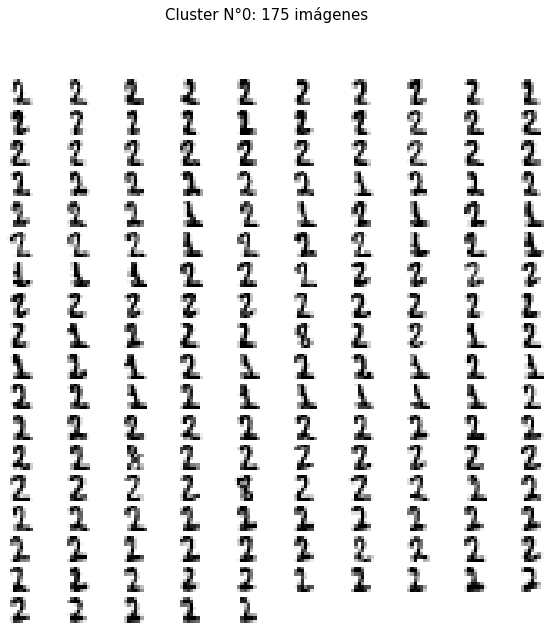

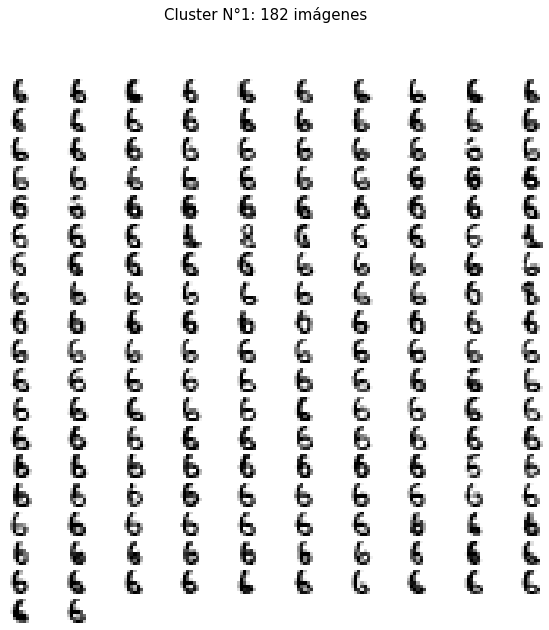

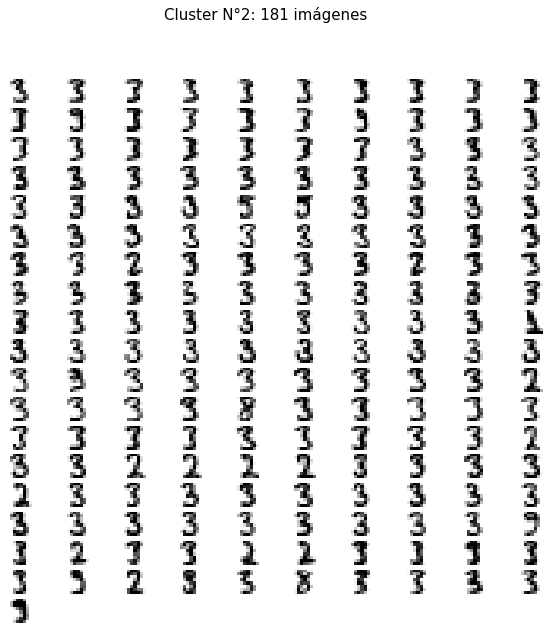

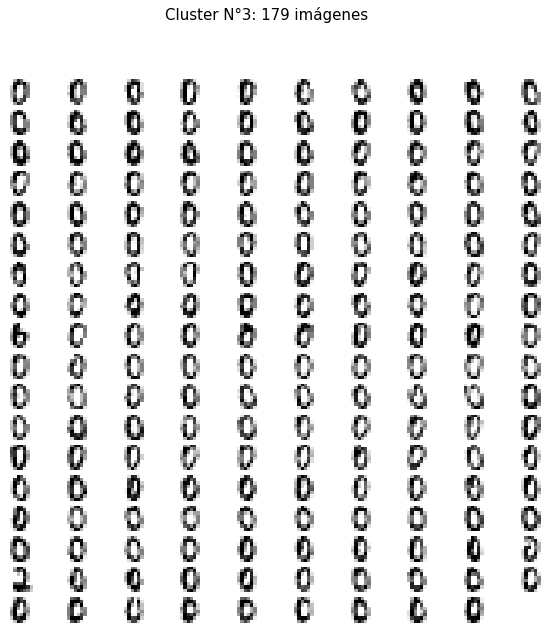

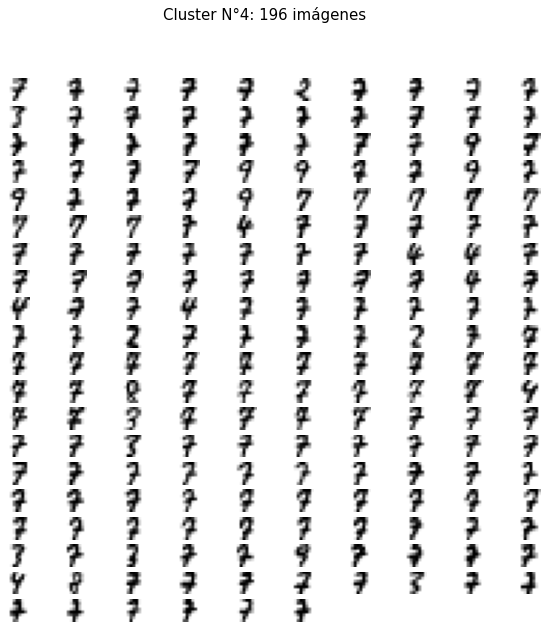

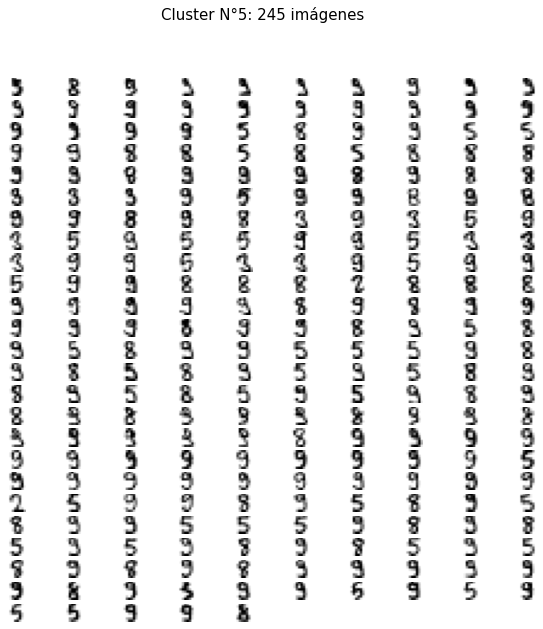

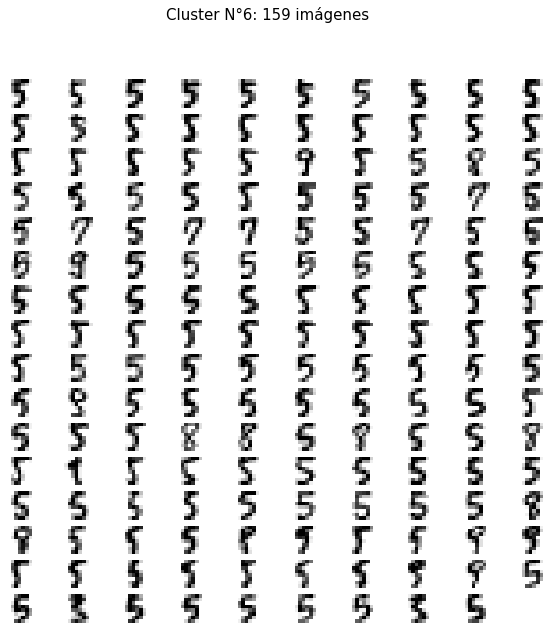

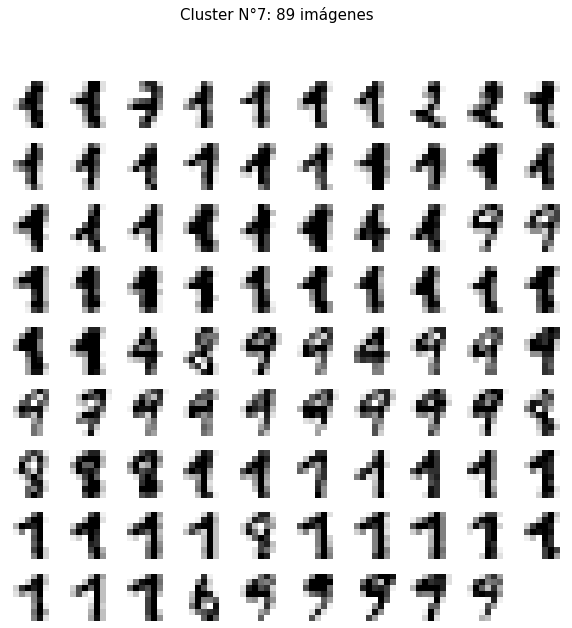

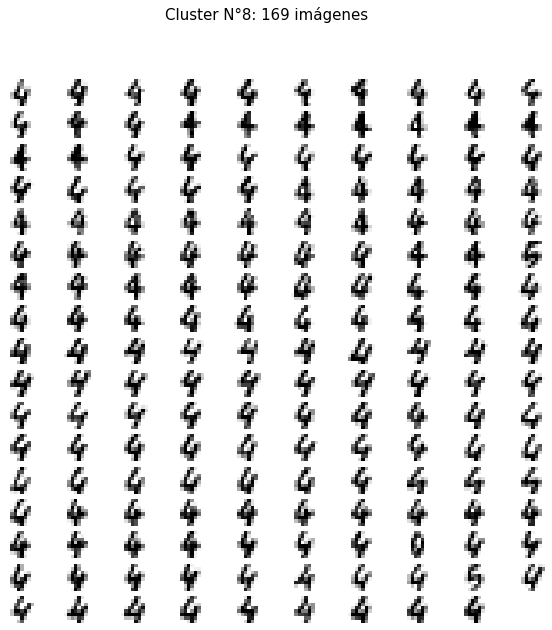

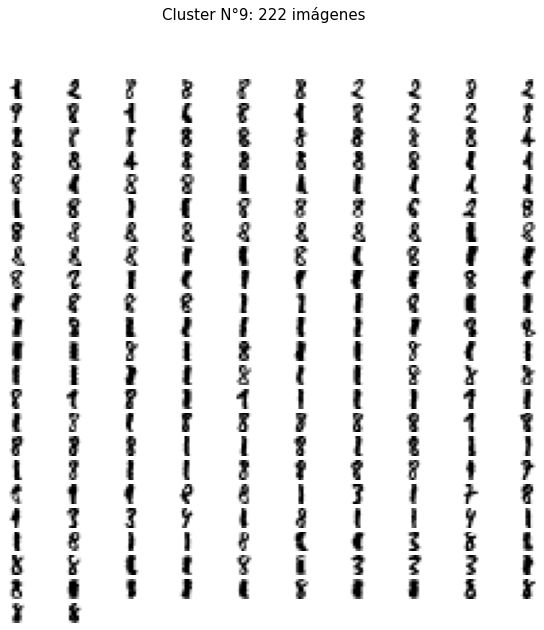

In [13]:
modelo2=KMeans(n_clusters=10,init='k-means++').fit(X) #Armado del modelo
resultado2=modelo2.predict(X) #Predicción
cluster_imagen(resultado2,X) #Bastante mejor!!!

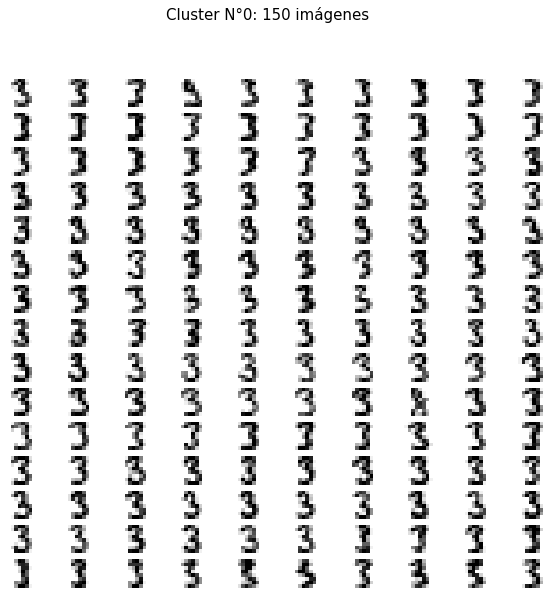

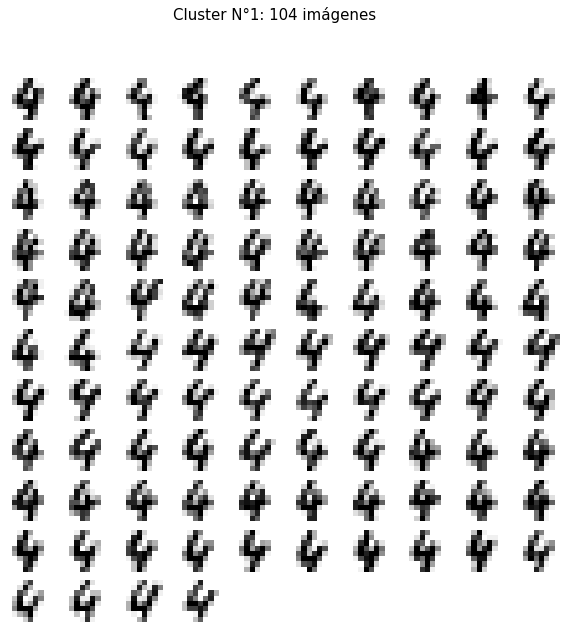

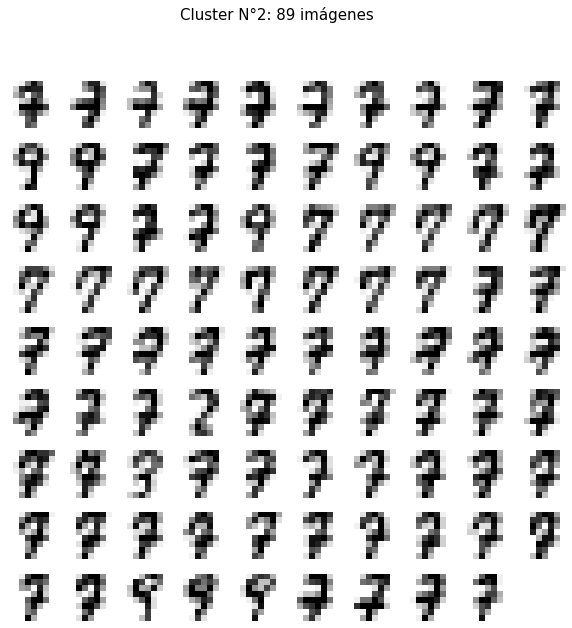

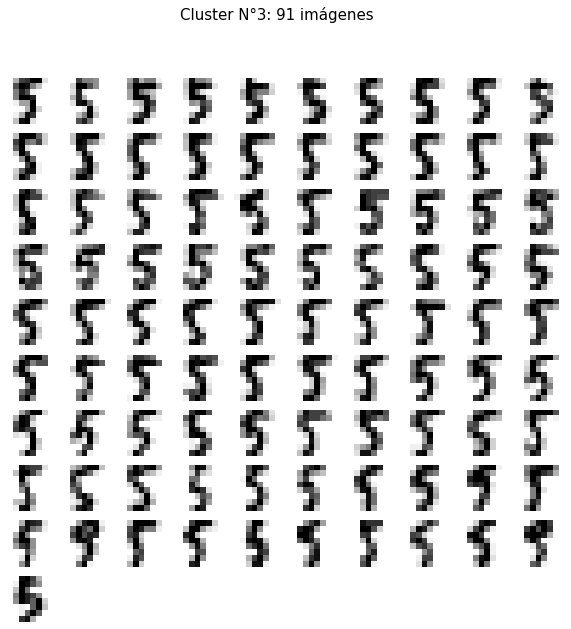

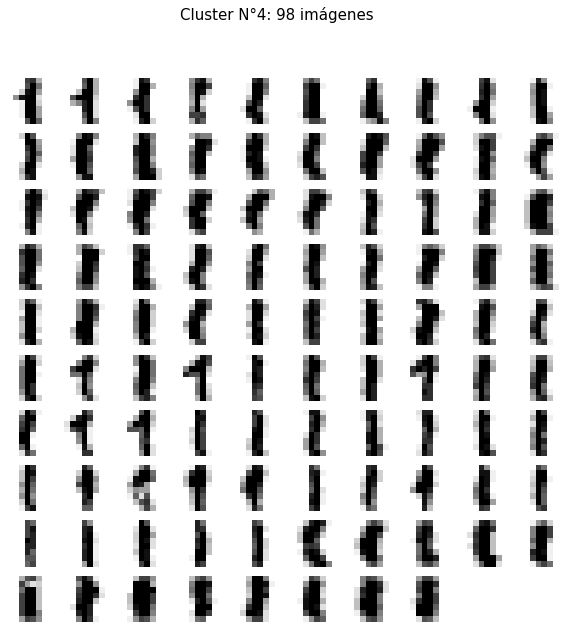

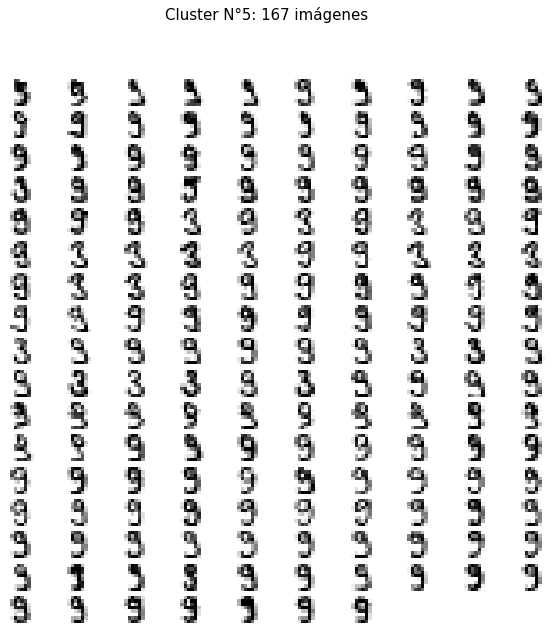

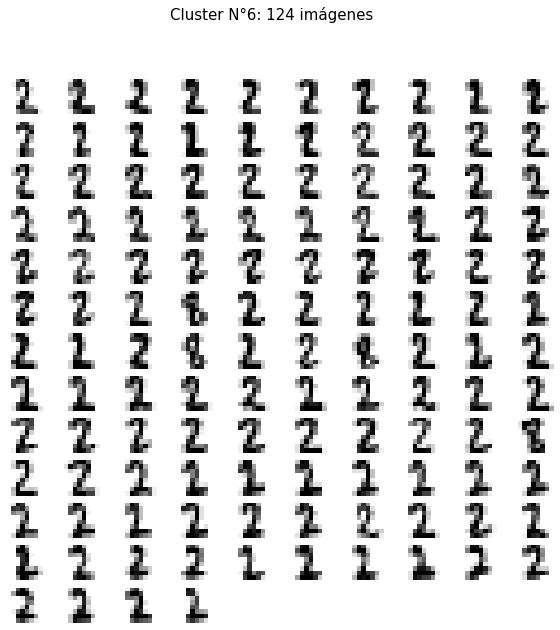

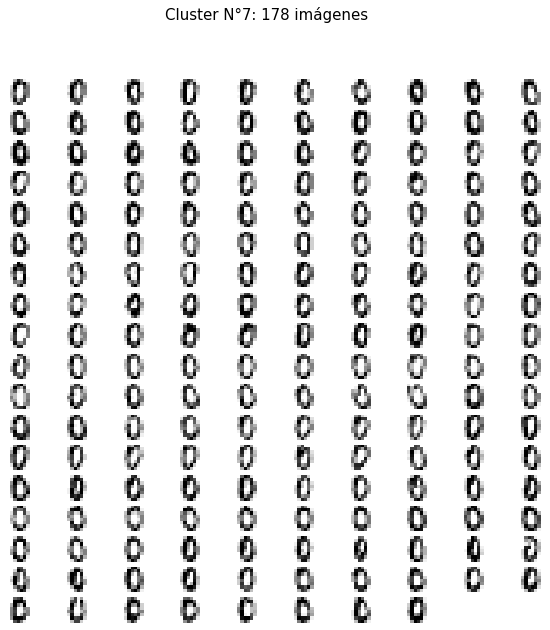

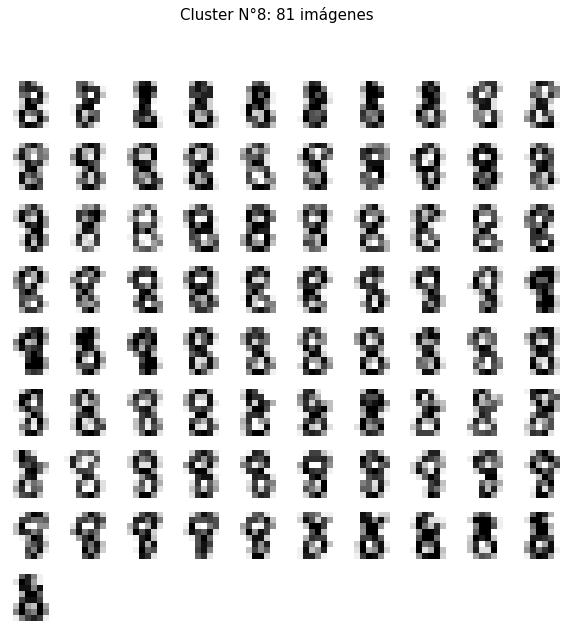

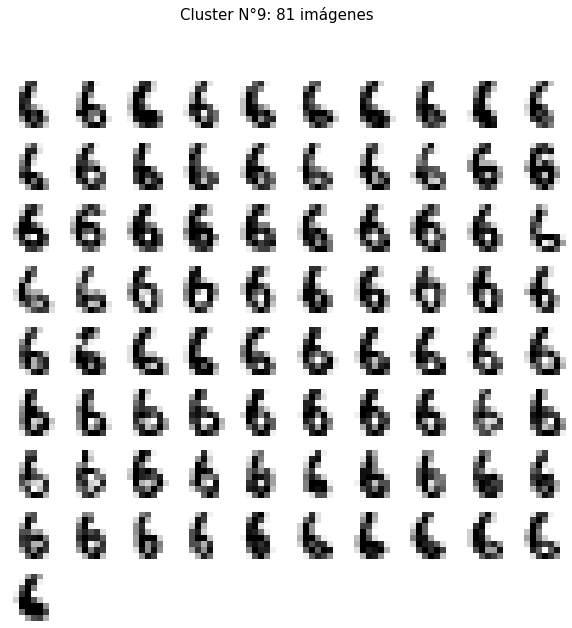

In [14]:
modelo3= AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')
resultado3=modelo3.fit_predict(X)
cluster_imagen(resultado3,X) 